# Natural Language Processing (NLP)
## Text Categorization

+ https://realpython.com/python-nltk-sentiment-analysis/
+ https://www.nltk.org/howto/classify.html
+ https://www.nltk.org/book/ch06.html
+ https://www.tensorflow.org/text/tutorials/classify_text_with_bert

## NLP Pipeline

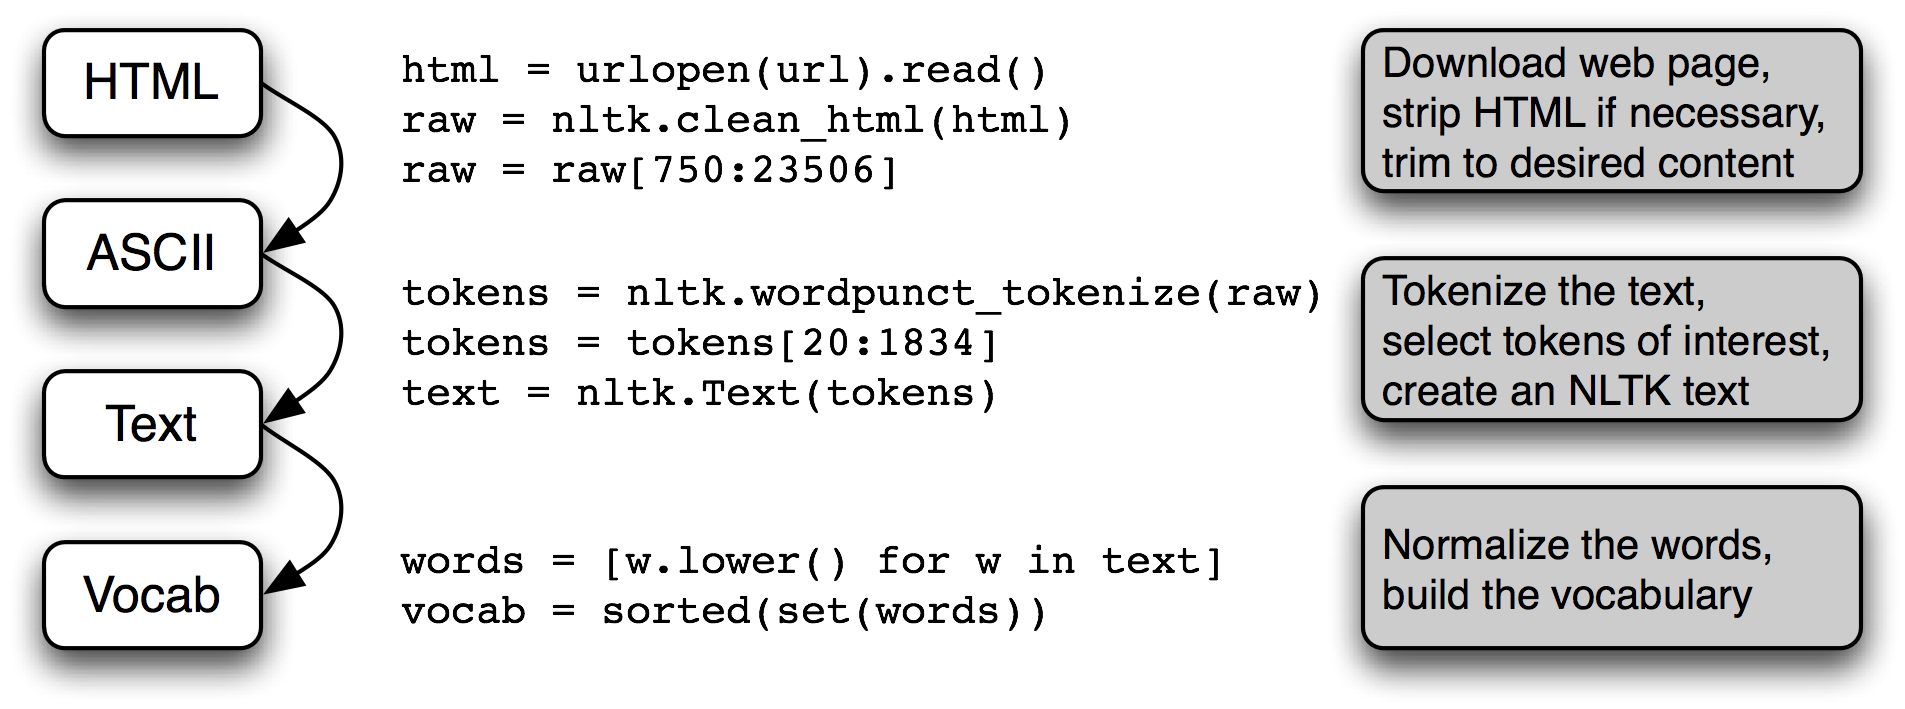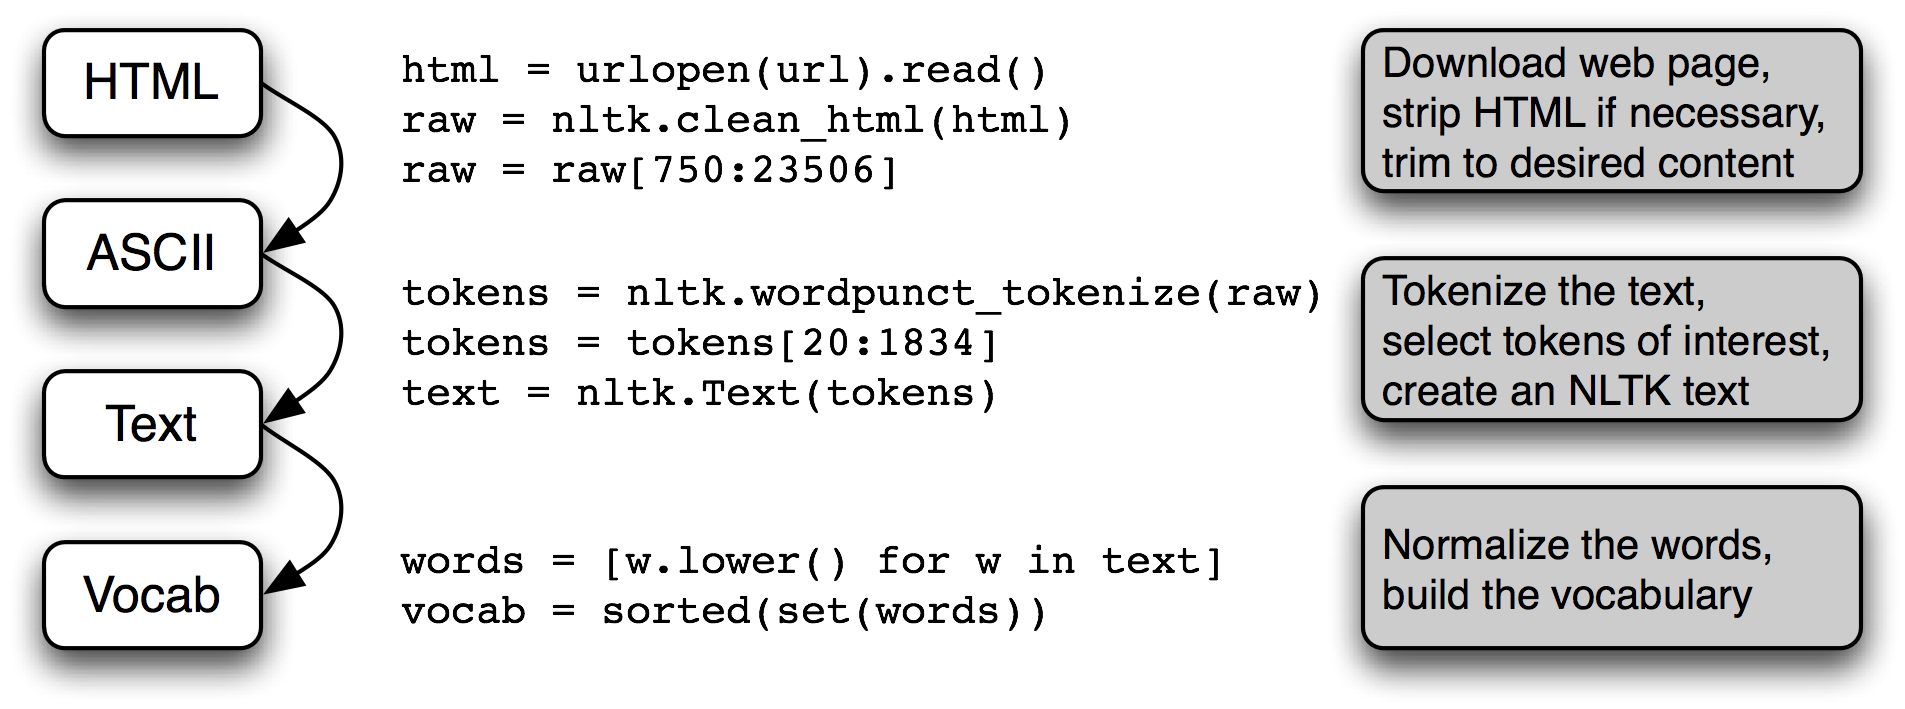

In [1]:
import nltk                                   #Natural Language Toolkit (https://www.nltk.org/)
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer  # A word stemmer based on the Porter stemming algorithm.  Porter, M. "An algorithm for suffix stripping." Program 14.3 (1980): 130-137.
from nltk import pos_tag
from nltk.tree import tree
from nltk.book import *
from nltk import FreqDist

nltk.download("book")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')      #looks like you have to download select neural layers for specific functions, head to read the erorr output to learn this.

stemmer = PorterStemmer()

import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils

import os
import openai


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\ChristopherWood2\
[nltk_data]    |     AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\ChristopherWood
[nltk_data]    |     2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to C:\Users\ChristopherWoo
[nltk_data]    |     d2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to C:\Users\ChristopherWo
[nltk_data]    |     od2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to C:\Users\Christopher
[nltk_data]    |     Wood2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading packag